## Module 2 Project
### Physics/Biology 212, Spring 2020

Laird Stewart <br>
Group members, if any: NA <br>
Date: 02/20/20

## Introduction

Problem Analysis

Model Development

Code Analysis

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import rc
#help(odeint)

In [140]:
def RK2SystemArg(xPrime, x0, t, args=()):
    """
    Solves a system of ODEs using the Runge-Kutta second order (RK2) method. 
    Allows passing arguments to the function being integrated.

    Usage:
        x = RK2SystemArg(xPrime, x0, t, args=()):
    
        
        xPrime -- the right hand side of the equation dx/dt = f, which must be integrated; should return 
            a 1d numpy array of derivatives 
        x0 -- intitial condition for x; should be a 1-d numpy array of the same dimensions as the 
            return value of xPrime()
        t -- time points, at which the value of the solution is needed, should be a 1-d numpy array
        args=() -- tuple of arguments to be passes to the xPrime function 
        
        x -- 2-d numpy array of values of the solution vector at every requested time point
        
    The function does not check for whether the dimensionality of x0 and the return argument of xPrime()
    match, and the function will fail if they don't.
    """
    
    x  = np.zeros((t.size, x0.size))  # initiatize the array of results at requested time points
    dt = np.diff(t)                   # time steps
    x[0,:] = x0                       # set the initial conditions

    for i in range(1, t.size):        # Loop over all time steps
        der = xPrime(x[i-1,:], t[i-1], *args)        # current derivative
        pred = x[i-1,:] + dt[i-1] * der              # predicted variable value
        pred_der = xPrime(pred, t[i], *args)         # predicted future derivative
        x[i,:] = x[i-1,:]+0.5*(der+pred_der)*dt[i-1] # corrected variable value

    return x

In [199]:
def pendulum(thetaW, t, l, gprime, a, omega):
    if(l == 0): 
        raise Exception("length can't be zero")
    
    """
    given current values of theta and w(angular velocity) return their derivatives with respect to t. 
    
    thetaW: array holding current theta in first element, and current w in second element [0,1]
    length: length of the pendulum in meters
    gammaPrime: gamma/ml, where m is mass, gamma is the dampening constant
    a: A/(m*l^2), where A is the force applied constant 
    omega: horizontal time shift of periodic applied force sin function
    t: time 
    """
    g = 9.8 
    
    dTheta = thetaW[1]
    dw = -(g/l)*np.sin(thetaW[0]) - gprime*thetaW[1] + a*np.sin(omega*t)
    
    return np.array((dTheta,dw))

In [201]:
import numpy as np
from scipy.integrate import odeint

thetaW = np.array((45,0)) # starting angle (45 degrees) and angular velocity
dt = 0.25                   # time step for integration
SimulationTime = 50.0         # time to solve for
t = np.arange(0,SimulationTime+dt,dt)    #array of time steps

l = 10 
gprime = 0 
a = 0
omega = 0

odeint = odeint(pendulum, thetaW, t, args=(l, gprime, a, omega))
RK2 = RK2SystemArg(pendulum, thetaW, t, args=(l, gprime, a, omega))

NameError: name 't' is not defined

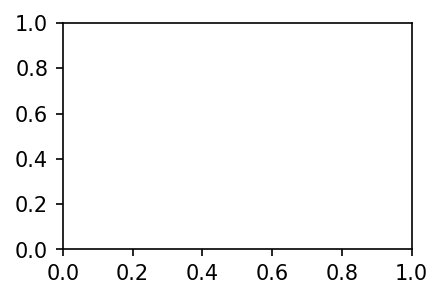

In [3]:
fig, ax = plt.subplots(figsize=(3, 2), dpi= 150, facecolor='w', edgecolor='k')
plt.plot(t, odeint[:,0],label='oedint')
plt.plot(t, RK2[:,0],label='rk2')
plt.legend()
plt.title('chaotic pendulum')
plt.xlabel('$t$')
plt.ylabel('theta')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2), dpi= 150, facecolor='w', edgecolor='k')
plt.plot(t, odeint[:,1],label='odeint')
plt.plot(t, RK2[:,1],label='rk2')
plt.legend()
plt.title('chaotic pendulum')
plt.xlabel('$t$')
plt.ylabel('starting velocity w')
plt.show()

TypeError: 'function' object is not subscriptable

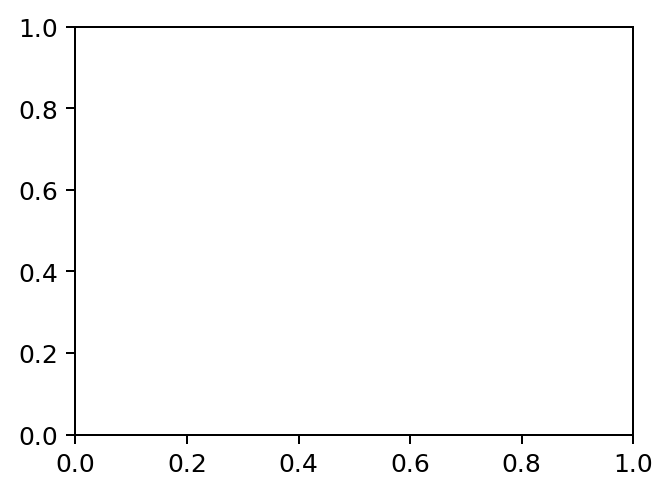

In [4]:
# 2d plot
fig, ax = plt.subplots(figsize=(4, 3), dpi= 180, facecolor='w', edgecolor='k')
plt.plot(odeint[:,0], odeint[:,1], label = 'odeint')
plt.plot(RK2[:,0], RK2[:,1], label = 'r2k')
plt.legend()

plt.title('pendulum')
plt.xlabel('theta')
plt.ylabel('angular velocity')
plt.show()

In [189]:
import numpy as np
from scipy.integrate import odeint

thetaW1 = np.array((33,1)) # starting angle (45 degrees) and angular velocity
thetaW2 = np.array((33.3,1))
dt = 0.25e-1                # time step for integration
SimulationTime = 10.0         # time to solve for
t = np.arange(0,SimulationTime+dt,dt)    #array of time steps

l = 10 
gprime = 0 
a = 0
omega = 0

odeint1 = odeint(pendulum, thetaW1, t, args=(l, gprime, a, omega))
odeint2 = odeint(pendulum, thetaW2, t, args=(l, gprime, a, omega))

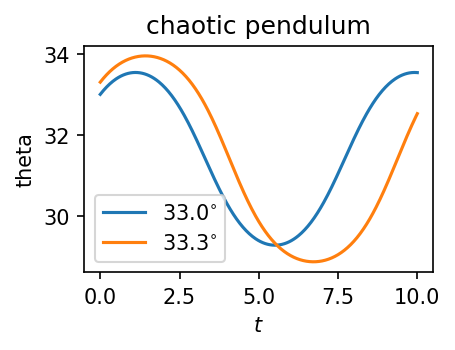

In [190]:
fig, ax = plt.subplots(figsize=(3, 2), dpi= 150, facecolor='w', edgecolor='k')
plt.plot(t, odeint1[:,0],label='$33.0 ^{\circ}$')
plt.plot(t, odeint2[:,0],label='$33.3 ^{\circ}$')
plt.legend()
plt.title('chaotic pendulum')
plt.xlabel('$t$')
plt.ylabel('theta')
plt.show()

### 

In [221]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

thetaW = np.array((45,1))

mass = 10
length = 10
gamma = 5
A = 5
omega = 1
gammaPrime = gamma/(mass*length) 
a = A/(mass*length**2)



odeint = odeint(pendulum, thetaW1, t, args=(l, gprime, a, omega))

fig = plt.figure()
ax = plt.axes(projection='3d')

x = odeint[:,0] # theta
y = odeint[:,1] # angular velocity
z = A*np.sin(omega*t) # force
ax.plot3D(x, y, z)




TypeError: 'numpy.ndarray' object is not callable

In [226]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

thetaW = np.array((45,1))

mass = 10
length = 10
gamma = 5
A = 5
omega = 1
gammaPrime = gamma/(mass*length) 
a = A/(mass*length**2)

SimulationTime = 10 
dt = 1
t=np.arange(0,SimulationTime+dt,dt)    # creating an array of times to solve for the populations at

odeint = odeint(pendulum, thetaW, t, args=(l, gprime, a, omega))

fig = plt.figure()
ax = plt.axes(projection='3d')

x = odeint[:,0] # theta
y = odeint[:,1] # angular velocity
z = A*np.sin(omega*t) # force
ax.plot3D(x, y, z)

TypeError: 'numpy.ndarray' object is not callable